<a href="https://colab.research.google.com/github/SonaliDhage04/LGMVIP/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author- Sonali Pravin Dhage
LGMVIP
Task4 - Stock market prediction and forecasting using stacked lstm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv('stdata.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df.shape

(2035, 8)

In [9]:
df['Date']= pd.to_datetime(df['Date'])
print(type(df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
df = df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [11]:
df.reset_index(inplace= True)

In [12]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [13]:
df_close=df['Close']


Text(0.5, 1.0, 'Stock Prediction')

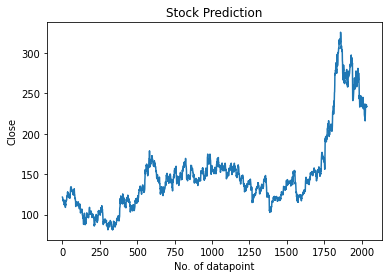

In [14]:
plt.plot(df_close)
plt.xlabel('No. of datapoint')
plt.ylabel('Close')
plt.title('Stock Prediction')

In [15]:
f1=df['Close']


In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
f1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
f1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
train_size=int(len(f1)*0.70)
test_size=len(f1)-train_size
train_data,test_data=f1[0:train_size,:],f1[train_size:len(f1),:1]

In [18]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1323, 100)
(1323,)
(510, 100)
(510,)


(None, None)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
19/19 [==============================] - 10s 245ms/step - loss: 0.0141 - accuracy: 8.4034e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 3s 168ms/step - loss: 0.0021 - accuracy: 8.4034e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 3s 171ms/step - loss: 9.9253e-04 - accuracy: 8.4034e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 3s 172ms/step - loss: 8.4360e-04 - accuracy: 8.4034e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 3s 172ms/step - loss: 8.2594e-04 - accuracy: 8.4034e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 3s 171ms/step - loss: 8.0313e-04 - accuracy: 8.4034e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 3s 172ms/step - loss: 7.7965e-0

In [24]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.027340448167807382

In [26]:
from sklearn import metrics
np.round(metrics.r2_score(y_train, train_predict),2)

0.92

In [27]:
math.sqrt(mean_squared_error(ytest, test_predict))

0.057825745600045164

In [28]:
np.round(metrics.r2_score(ytest, test_predict),2)

0.95

In [29]:
train_predict =scaler.inverse_transform(train_predict)
test_predict =scaler.inverse_transform(test_predict)
y_train =scaler.inverse_transform(y_train.reshape(-1,1))
ytest =scaler.inverse_transform(ytest.reshape(1,-1))

In [30]:
look_back = 100
trainPredictPlot = np.empty_like(f1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [31]:
testPredictPlot = np.empty_like(f1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(f1) - 1, :] = test_predict

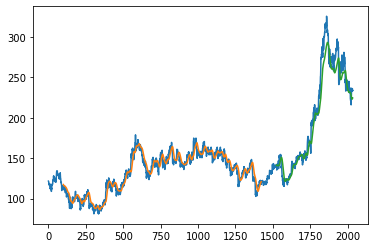

In [32]:
plt.plot(scaler.inverse_transform(f1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()